In [119]:
import numpy as np

from sympy import * 

import math

def nCr(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)

def rref(A, tol=1.0e-12):
    m, n = A.shape
    i, j = 0, 0
    jb = []

    while i < m and j < n:
        # Find value and index of largest element in the remainder of column j
        k = np.argmax(np.abs(A[i:m, j])) + i
        p = np.abs(A[k, j])
        if p <= tol:
            # The column is negligible, zero it out
            A[i:m, j] = 0.0
            j += 1
        else:
            # Remember the column index
            jb.append(j)
            if i != k:
                # Swap the i-th and k-th rows
                A[[i, k], j:n] = A[[k, i], j:n]
            # Divide the pivot row i by the pivot element A[i, j]
            A[i, j:n] = A[i, j:n] / A[i, j]
            # Subtract multiples of the pivot row from all the other rows
            for k in range(m):
                if k != i:
                    A[k, j:n] -= A[k, j] * A[i, j:n]
            i += 1
            j += 1
    # Finished
    return A

# 1. CodedBookDesign

## 1.1. Proposed

In [120]:
N   = 40
K   = 8
T_0 = 4

Bin_num = int(40/T_0)

Bin_Sel_num = int(K/T_0)
Bin_size = T_0

B = int(nCr(Bin_num, Bin_Sel_num))

print('Coded Size=', B)

Coded Size= 45


In [121]:
import itertools

#defines the array of numbers and the two columns
number = range(Bin_num)
col_one = []

#creates an array that holds the first four
results = itertools.combinations(number,Bin_Sel_num)

for x in results:
#     print(x)
    col_one.append(list(x))
    
col_one = np.array(col_one)
print(np.shape(col_one))

Codebook_tmp = np.zeros((B,Bin_num), dtype='int')
Codebook = np.zeros((B,N), dtype='int')

for b in range(B):    
    for sel in col_one[b,:]:
        stt_pos = sel * Bin_size
        end_pos = (sel+1) * Bin_size
        Codebook_tmp[b,sel] = 1
        Codebook[b,stt_pos:end_pos] = 1
    
Codebook_Proposed = Codebook
# print(Codebook_tmp)
# print(Codebook[4,:])

(45, 2)


In [126]:
N   = 40
K   = 8
T_0 = 2

Bin_num = int(40/T_0)

Bin_Sel_num = int(K/T_0)
Bin_size = T_0

B = int(nCr(Bin_num, Bin_Sel_num))

print('Coded Size=', B)

import itertools

#defines the array of numbers and the two columns
number = range(Bin_num)
col_one = []

#creates an array that holds the first four
results = itertools.combinations(number,Bin_Sel_num)

for x in results:
#     print(x)
    col_one.append(list(x))
    
col_one = np.array(col_one)
print(np.shape(col_one))

Codebook_tmp = np.zeros((B,Bin_num), dtype='int')
Codebook = np.zeros((B,N), dtype='int')

for b in range(B):    
    for sel in col_one[b,:]:
        stt_pos = sel * Bin_size
        end_pos = (sel+1) * Bin_size
        Codebook_tmp[b,sel] = 1
        Codebook[b,stt_pos:end_pos] = 1
    
Codebook_Proposed_T2 = Codebook
# print(Codebook_tmp)
# print(Codebook[4,:])

Coded Size= 4845
(4845, 4)


In [132]:
print(15*19*17)

4845


## 1.2. Partition Codebook

In [122]:
B_Partition = int(N/K)

Codebook_Partition = np.zeros((B_Partition,N), dtype='int')

for b in range(B_Partition):
    stt_pos = b * K
    end_pos = (b+1) * K
    Codebook_Partition[b,stt_pos:end_pos] = 1
print(Codebook_Partition)

[[1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
  1 1 1 1]]


# 2. Main Simulation

In [127]:
J = 50  # Total iterations
p = 0.3 # dropout rate



is_print = False
# is_print = False

is_print_tmp = True

N_schemes = 4

N_trial = 1000

Agg_Card = np.zeros((N_schemes, N_trial, J))
Privacy  = np.zeros((N_schemes, N_trial, J))


for trial_idx in range(N_trial):
    
    print('trial_idx=',trial_idx)
#     print()
    
    P_random    = []
    P_partition = []
    P_proposed  = []
    P_proposed_T2 = []
    
    for j in range(J):
        u = np.random.binomial(1, 1-p, size=(N))
        if is_print:
            print('[iter=',j,'] Surviving vector u=',u)

        if np.sum(u) < K:
            p_tmp = np.zero(N)

            P_random.append(p_tmp)
            P_partition.append(p_tmp)
            P_proposed.append(p_tmp)
            P_proposed_T2.append(p_tmp)
        else:
            result = np.where(u == 1)

            ###############################
            # 1. Random Selection
            ###############################
            select = np.random.choice(result[0], K, replace=False)

            p_tmp = np.zeros(N)
            p_tmp[select] = 1

            P_random.append(p_tmp)

            # 1.1 Calculate Privacy
            P = np.array(P_random)
            P_rref = rref(P)

            P_num = np.count_nonzero(np.array(P_rref),axis = 1)
            zero_index = np.where(P_num == 0)
            P_num[zero_index] = N+1

            partial_sum = np.min(P_num)

            if j == 0:
                Privacy[0,trial_idx,j] = partial_sum
            else:
                Privacy[0,trial_idx,j] = np.min([partial_sum, Privacy[0,trial_idx,j-1]])

            # 1.2. Calculate Aggregation Cardinality
            acc_card = np.sum(np.array(P_random),axis=0)
            acc_card = np.sum(acc_card)

            Agg_Card[0,trial_idx,j] = acc_card/(j+1)


            if is_print:
                print('[iter=',j,'] @Random Method, Codebook selection')

            ###############################
            # 2. Partition
            ###############################

            tmp = Codebook_Partition * u
            codebook_en = 1*(np.sum(tmp,axis=1) == K)
    #         print(np.sum(tmp,axis=1))
    #         print(codebook_en)

            if np.sum(codebook_en) == 0:
                if is_print:
                    print('[iter=',j,'] @Partition Method, there is no available codebook')
                p_tmp = np.zeros(N)
            else:
                if is_print:
                    print('[iter=',j,'] @Partition Method, Codebook selection')
                idx_en = np.where(codebook_en == 1)
                idx_sel = np.random.choice(idx_en[0], 1, replace=False)

                p_tmp = Codebook_Partition[idx_sel[0],:]

            P_partition.append(p_tmp)

            # 2.1 Calculate Privacy
            P = np.array(P_partition)
            P_rref = rref(P)

            P_num = np.count_nonzero(np.array(P_rref),axis = 1)
            zero_index = np.where(P_num == 0)
            P_num[zero_index] = N+1

            partial_sum = np.min(P_num)
            if partial_sum == N+1:
                partial_sum = K

            if j == 0:
                Privacy[1,trial_idx,j] = partial_sum
            else:
                Privacy[1,trial_idx,j] = np.min([partial_sum, Privacy[1,trial_idx,j-1]])

            # 2.2. Calculate Aggregation Cardinality
            acc_card = np.sum(np.array(P_partition),axis=0)
            acc_card = np.sum(acc_card)

            Agg_Card[1,trial_idx,j] = acc_card/(j+1)

            ###############################
            # 3. Proposed, T_0 = 4
            ###############################

            tmp = Codebook_Proposed * u
            codebook_en = 1*(np.sum(tmp,axis=1) == K)
    #         print(np.sum(tmp,axis=1))
    #         print(codebook_en)

            if np.sum(codebook_en) == 0:
                if is_print:
                    print('[iter=',j,'] @Proposed Method, there is no available codebook')
                p_tmp = np.zeros(N)
            else:
                if is_print:
                    print('[iter=',j,'] @Proposed Method, Codebook selection')
                idx_en = np.where(codebook_en == 1)
                idx_sel = np.random.choice(idx_en[0], 1, replace=False)

    #             print('idx_sel=',idx_sel)

                p_tmp = Codebook_Proposed[idx_sel[0],:]



            P_proposed.append(p_tmp)

            # 3.1 Calculate Privacy
            P = np.array(P_proposed)

            P_rref = rref(P)

            P_num = np.count_nonzero(np.array(P_rref),axis = 1)
            zero_index = np.where(P_num == 0)
            P_num[zero_index] = N+1

            partial_sum = np.min(P_num)
            if partial_sum == N+1:
                partial_sum = K

            if j == 0:
                Privacy[2,trial_idx,j] = partial_sum
            else:
                Privacy[2,trial_idx,j] = np.min([partial_sum, Privacy[2,trial_idx,j-1]])

            # 3.2. Calculate Aggregation Cardinality
            acc_card = np.sum(np.array(P_proposed),axis=0)
            acc_card = np.sum(acc_card)

            Agg_Card[2,trial_idx,j] = acc_card/(j+1)
            
            
            
            ###############################
            # 4. Proposed, T_0 = 2
            ###############################

            tmp = Codebook_Proposed_T2 * u
            codebook_en = 1*(np.sum(tmp,axis=1) == K)
    #         print(np.sum(tmp,axis=1))
    #         print(codebook_en)

            if np.sum(codebook_en) == 0:
                if is_print:
                    print('[iter=',j,'] @Proposed Method 2, there is no available codebook')
                p_tmp = np.zeros(N)
            else:
                if is_print:
                    print('[iter=',j,'] @Proposed Method 2, Codebook selection')
                idx_en = np.where(codebook_en == 1)
                idx_sel = np.random.choice(idx_en[0], 1, replace=False)

    #             print('idx_sel=',idx_sel)

                p_tmp = Codebook_Proposed_T2[idx_sel[0],:]



            P_proposed_T2.append(p_tmp)

            # 3.1 Calculate Privacy
            P = np.array(P_proposed_T2)

            P_rref = rref(P)

            P_num = np.count_nonzero(np.array(P_rref),axis = 1)
            zero_index = np.where(P_num == 0)
            P_num[zero_index] = N+1

            partial_sum = np.min(P_num)
            if partial_sum == N+1:
                partial_sum = K

            if j == 0:
                Privacy[3,trial_idx,j] = partial_sum
            else:
                Privacy[3,trial_idx,j] = np.min([partial_sum, Privacy[3,trial_idx,j-1]])

            # 3.2. Calculate Aggregation Cardinality
            acc_card = np.sum(np.array(P_proposed_T2),axis=0)
            acc_card = np.sum(acc_card)

            Agg_Card[3,trial_idx,j] = acc_card/(j+1)


            if is_print:
                print()


        # random selection

#     print(Privacy)
#     print()
#     print(Agg_Card)


mean_priavcy_p03 = np.sum(Privacy, axis=1)/N_trial
print(np.shape(mean_priavcy_p03))

mean_Agg_Card_p03 = np.sum(Agg_Card, axis=1)/N_trial
print(np.shape(mean_Agg_Card_p03))

trial_idx= 0
trial_idx= 1
trial_idx= 2
trial_idx= 3
trial_idx= 4
trial_idx= 5
trial_idx= 6
trial_idx= 7
trial_idx= 8
trial_idx= 9
trial_idx= 10
trial_idx= 11
trial_idx= 12
trial_idx= 13
trial_idx= 14
trial_idx= 15
trial_idx= 16
trial_idx= 17
trial_idx= 18
trial_idx= 19
trial_idx= 20
trial_idx= 21
trial_idx= 22
trial_idx= 23
trial_idx= 24
trial_idx= 25
trial_idx= 26
trial_idx= 27
trial_idx= 28
trial_idx= 29
trial_idx= 30
trial_idx= 31
trial_idx= 32
trial_idx= 33
trial_idx= 34
trial_idx= 35
trial_idx= 36
trial_idx= 37
trial_idx= 38
trial_idx= 39
trial_idx= 40
trial_idx= 41
trial_idx= 42
trial_idx= 43
trial_idx= 44
trial_idx= 45
trial_idx= 46
trial_idx= 47
trial_idx= 48
trial_idx= 49
trial_idx= 50
trial_idx= 51
trial_idx= 52
trial_idx= 53
trial_idx= 54
trial_idx= 55
trial_idx= 56
trial_idx= 57
trial_idx= 58
trial_idx= 59
trial_idx= 60
trial_idx= 61
trial_idx= 62
trial_idx= 63
trial_idx= 64
trial_idx= 65
trial_idx= 66
trial_idx= 67
trial_idx= 68
trial_idx= 69
trial_idx= 70
trial_idx= 71
tr

trial_idx= 554
trial_idx= 555
trial_idx= 556
trial_idx= 557
trial_idx= 558
trial_idx= 559
trial_idx= 560
trial_idx= 561
trial_idx= 562
trial_idx= 563
trial_idx= 564
trial_idx= 565
trial_idx= 566
trial_idx= 567
trial_idx= 568
trial_idx= 569
trial_idx= 570
trial_idx= 571
trial_idx= 572
trial_idx= 573
trial_idx= 574
trial_idx= 575
trial_idx= 576
trial_idx= 577
trial_idx= 578
trial_idx= 579
trial_idx= 580
trial_idx= 581
trial_idx= 582
trial_idx= 583
trial_idx= 584
trial_idx= 585
trial_idx= 586
trial_idx= 587
trial_idx= 588
trial_idx= 589
trial_idx= 590
trial_idx= 591
trial_idx= 592
trial_idx= 593
trial_idx= 594
trial_idx= 595
trial_idx= 596
trial_idx= 597
trial_idx= 598
trial_idx= 599
trial_idx= 600
trial_idx= 601
trial_idx= 602
trial_idx= 603
trial_idx= 604
trial_idx= 605
trial_idx= 606
trial_idx= 607
trial_idx= 608
trial_idx= 609
trial_idx= 610
trial_idx= 611
trial_idx= 612
trial_idx= 613
trial_idx= 614
trial_idx= 615
trial_idx= 616
trial_idx= 617
trial_idx= 618
trial_idx= 619
trial_idx=

(4, 50)


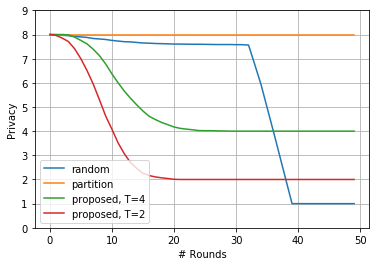

(4, 50)


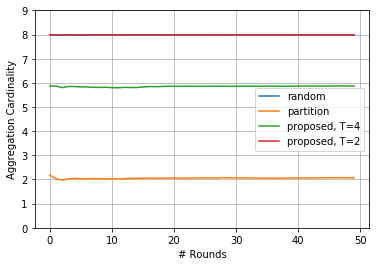

In [129]:
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt

plt.plot(mean_priavcy_p03[0,:], label='random')
plt.plot(mean_priavcy_p03[1,:], label='partition')
plt.plot(mean_priavcy_p03[2,:], label='proposed, T=4')
plt.plot(mean_priavcy_p03[3,:], label='proposed, T=2')
plt.ylabel('Privacy')
plt.xlabel('# Rounds')
plt.ylim([0,9])
plt.grid()
plt.legend()
plt.show()

plt.plot(mean_Agg_Card_p03[0,:], label='random')
plt.plot(mean_Agg_Card_p03[1,:], label='partition')
plt.plot(mean_Agg_Card_p03[2,:], label='proposed, T=4')
plt.plot(mean_Agg_Card_p03[3,:], label='proposed, T=2')
plt.ylabel('Aggregation Cardinality')
plt.xlabel('# Rounds')
plt.ylim([0,9])
plt.grid()
plt.legend()
plt.show()

In [130]:
J = 50  # Total iterations
p = 0.2 # dropout rate



is_print = False
# is_print = False

is_print_tmp = True

N_schemes = 4

N_trial = 1000

Agg_Card = np.zeros((N_schemes, N_trial, J))
Privacy  = np.zeros((N_schemes, N_trial, J))


for trial_idx in range(N_trial):
    
    print('trial_idx=',trial_idx)
#     print()
    
    P_random    = []
    P_partition = []
    P_proposed  = []
    P_proposed_T2 = []
    
    for j in range(J):
        u = np.random.binomial(1, 1-p, size=(N))
        if is_print:
            print('[iter=',j,'] Surviving vector u=',u)

        if np.sum(u) < K:
            p_tmp = np.zero(N)

            P_random.append(p_tmp)
            P_partition.append(p_tmp)
            P_proposed.append(p_tmp)
            P_proposed_T2.append(p_tmp)
        else:
            result = np.where(u == 1)

            ###############################
            # 1. Random Selection
            ###############################
            select = np.random.choice(result[0], K, replace=False)

            p_tmp = np.zeros(N)
            p_tmp[select] = 1

            P_random.append(p_tmp)

            # 1.1 Calculate Privacy
            P = np.array(P_random)
            P_rref = rref(P)

            P_num = np.count_nonzero(np.array(P_rref),axis = 1)
            zero_index = np.where(P_num == 0)
            P_num[zero_index] = N+1

            partial_sum = np.min(P_num)

            if j == 0:
                Privacy[0,trial_idx,j] = partial_sum
            else:
                Privacy[0,trial_idx,j] = np.min([partial_sum, Privacy[0,trial_idx,j-1]])

            # 1.2. Calculate Aggregation Cardinality
            acc_card = np.sum(np.array(P_random),axis=0)
            acc_card = np.sum(acc_card)

            Agg_Card[0,trial_idx,j] = acc_card/(j+1)


            if is_print:
                print('[iter=',j,'] @Random Method, Codebook selection')

            ###############################
            # 2. Partition
            ###############################

            tmp = Codebook_Partition * u
            codebook_en = 1*(np.sum(tmp,axis=1) == K)
    #         print(np.sum(tmp,axis=1))
    #         print(codebook_en)

            if np.sum(codebook_en) == 0:
                if is_print:
                    print('[iter=',j,'] @Partition Method, there is no available codebook')
                p_tmp = np.zeros(N)
            else:
                if is_print:
                    print('[iter=',j,'] @Partition Method, Codebook selection')
                idx_en = np.where(codebook_en == 1)
                idx_sel = np.random.choice(idx_en[0], 1, replace=False)

                p_tmp = Codebook_Partition[idx_sel[0],:]

            P_partition.append(p_tmp)

            # 2.1 Calculate Privacy
            P = np.array(P_partition)
            P_rref = rref(P)

            P_num = np.count_nonzero(np.array(P_rref),axis = 1)
            zero_index = np.where(P_num == 0)
            P_num[zero_index] = N+1

            partial_sum = np.min(P_num)
            if partial_sum == N+1:
                partial_sum = K

            if j == 0:
                Privacy[1,trial_idx,j] = partial_sum
            else:
                Privacy[1,trial_idx,j] = np.min([partial_sum, Privacy[1,trial_idx,j-1]])

            # 2.2. Calculate Aggregation Cardinality
            acc_card = np.sum(np.array(P_partition),axis=0)
            acc_card = np.sum(acc_card)

            Agg_Card[1,trial_idx,j] = acc_card/(j+1)

            ###############################
            # 3. Proposed, T_0 = 4
            ###############################

            tmp = Codebook_Proposed * u
            codebook_en = 1*(np.sum(tmp,axis=1) == K)
    #         print(np.sum(tmp,axis=1))
    #         print(codebook_en)

            if np.sum(codebook_en) == 0:
                if is_print:
                    print('[iter=',j,'] @Proposed Method, there is no available codebook')
                p_tmp = np.zeros(N)
            else:
                if is_print:
                    print('[iter=',j,'] @Proposed Method, Codebook selection')
                idx_en = np.where(codebook_en == 1)
                idx_sel = np.random.choice(idx_en[0], 1, replace=False)

    #             print('idx_sel=',idx_sel)

                p_tmp = Codebook_Proposed[idx_sel[0],:]



            P_proposed.append(p_tmp)

            # 3.1 Calculate Privacy
            P = np.array(P_proposed)

            P_rref = rref(P)

            P_num = np.count_nonzero(np.array(P_rref),axis = 1)
            zero_index = np.where(P_num == 0)
            P_num[zero_index] = N+1

            partial_sum = np.min(P_num)
            if partial_sum == N+1:
                partial_sum = K

            if j == 0:
                Privacy[2,trial_idx,j] = partial_sum
            else:
                Privacy[2,trial_idx,j] = np.min([partial_sum, Privacy[2,trial_idx,j-1]])

            # 3.2. Calculate Aggregation Cardinality
            acc_card = np.sum(np.array(P_proposed),axis=0)
            acc_card = np.sum(acc_card)

            Agg_Card[2,trial_idx,j] = acc_card/(j+1)
            
            
            
            ###############################
            # 4. Proposed, T_0 = 2
            ###############################

            tmp = Codebook_Proposed_T2 * u
            codebook_en = 1*(np.sum(tmp,axis=1) == K)
    #         print(np.sum(tmp,axis=1))
    #         print(codebook_en)

            if np.sum(codebook_en) == 0:
                if is_print:
                    print('[iter=',j,'] @Proposed Method 2, there is no available codebook')
                p_tmp = np.zeros(N)
            else:
                if is_print:
                    print('[iter=',j,'] @Proposed Method 2, Codebook selection')
                idx_en = np.where(codebook_en == 1)
                idx_sel = np.random.choice(idx_en[0], 1, replace=False)

    #             print('idx_sel=',idx_sel)

                p_tmp = Codebook_Proposed_T2[idx_sel[0],:]



            P_proposed_T2.append(p_tmp)

            # 3.1 Calculate Privacy
            P = np.array(P_proposed_T2)

            P_rref = rref(P)

            P_num = np.count_nonzero(np.array(P_rref),axis = 1)
            zero_index = np.where(P_num == 0)
            P_num[zero_index] = N+1

            partial_sum = np.min(P_num)
            if partial_sum == N+1:
                partial_sum = K

            if j == 0:
                Privacy[3,trial_idx,j] = partial_sum
            else:
                Privacy[3,trial_idx,j] = np.min([partial_sum, Privacy[3,trial_idx,j-1]])

            # 3.2. Calculate Aggregation Cardinality
            acc_card = np.sum(np.array(P_proposed_T2),axis=0)
            acc_card = np.sum(acc_card)

            Agg_Card[3,trial_idx,j] = acc_card/(j+1)


            if is_print:
                print()


        # random selection

#     print(Privacy)
#     print()
#     print(Agg_Card)

trial_idx= 0
trial_idx= 1
trial_idx= 2
trial_idx= 3
trial_idx= 4
trial_idx= 5
trial_idx= 6
trial_idx= 7
trial_idx= 8
trial_idx= 9
trial_idx= 10
trial_idx= 11
trial_idx= 12
trial_idx= 13
trial_idx= 14
trial_idx= 15
trial_idx= 16
trial_idx= 17
trial_idx= 18
trial_idx= 19
trial_idx= 20
trial_idx= 21
trial_idx= 22
trial_idx= 23
trial_idx= 24
trial_idx= 25
trial_idx= 26
trial_idx= 27
trial_idx= 28
trial_idx= 29
trial_idx= 30
trial_idx= 31
trial_idx= 32
trial_idx= 33
trial_idx= 34
trial_idx= 35
trial_idx= 36
trial_idx= 37
trial_idx= 38
trial_idx= 39
trial_idx= 40
trial_idx= 41
trial_idx= 42
trial_idx= 43
trial_idx= 44
trial_idx= 45
trial_idx= 46
trial_idx= 47
trial_idx= 48
trial_idx= 49
trial_idx= 50
trial_idx= 51
trial_idx= 52
trial_idx= 53
trial_idx= 54
trial_idx= 55
trial_idx= 56
trial_idx= 57
trial_idx= 58
trial_idx= 59
trial_idx= 60
trial_idx= 61
trial_idx= 62
trial_idx= 63
trial_idx= 64
trial_idx= 65
trial_idx= 66
trial_idx= 67
trial_idx= 68
trial_idx= 69
trial_idx= 70
trial_idx= 71
tr

trial_idx= 554
trial_idx= 555
trial_idx= 556
trial_idx= 557
trial_idx= 558
trial_idx= 559
trial_idx= 560
trial_idx= 561
trial_idx= 562
trial_idx= 563
trial_idx= 564
trial_idx= 565
trial_idx= 566
trial_idx= 567
trial_idx= 568
trial_idx= 569
trial_idx= 570
trial_idx= 571
trial_idx= 572
trial_idx= 573
trial_idx= 574
trial_idx= 575
trial_idx= 576
trial_idx= 577
trial_idx= 578
trial_idx= 579
trial_idx= 580
trial_idx= 581
trial_idx= 582
trial_idx= 583
trial_idx= 584
trial_idx= 585
trial_idx= 586
trial_idx= 587
trial_idx= 588
trial_idx= 589
trial_idx= 590
trial_idx= 591
trial_idx= 592
trial_idx= 593
trial_idx= 594
trial_idx= 595
trial_idx= 596
trial_idx= 597
trial_idx= 598
trial_idx= 599
trial_idx= 600
trial_idx= 601
trial_idx= 602
trial_idx= 603
trial_idx= 604
trial_idx= 605
trial_idx= 606
trial_idx= 607
trial_idx= 608
trial_idx= 609
trial_idx= 610
trial_idx= 611
trial_idx= 612
trial_idx= 613
trial_idx= 614
trial_idx= 615
trial_idx= 616
trial_idx= 617
trial_idx= 618
trial_idx= 619
trial_idx=

(4, 50)


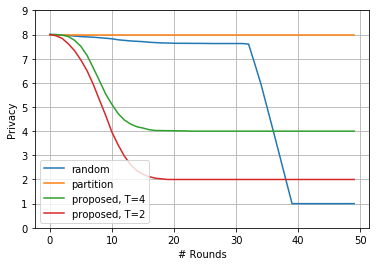

(4, 50)


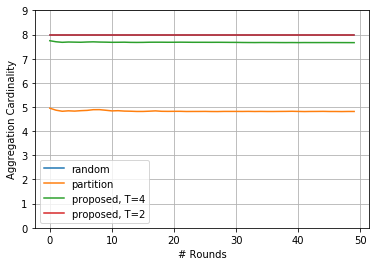

In [131]:
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt

mean_priavcy_p02 = np.sum(Privacy, axis=1)/N_trial
print(np.shape(mean_priavcy_p02))

plt.plot(mean_priavcy_p02[0,:], label='random')
plt.plot(mean_priavcy_p02[1,:], label='partition')
plt.plot(mean_priavcy_p02[2,:], label='proposed, T=4')
plt.plot(mean_priavcy_p02[3,:], label='proposed, T=2')
plt.ylabel('Privacy')
plt.xlabel('# Rounds')
plt.ylim([0,9])
plt.grid()
plt.legend()
plt.show()

mean_Agg_Card_p02 = np.sum(Agg_Card, axis=1)/N_trial
print(np.shape(mean_Agg_Card_p02))

plt.plot(mean_Agg_Card_p02[0,:], label='random')
plt.plot(mean_Agg_Card_p02[1,:], label='partition')
plt.plot(mean_Agg_Card_p02[2,:], label='proposed, T=4')
plt.plot(mean_Agg_Card_p02[3,:], label='proposed, T=2')
plt.ylabel('Aggregation Cardinality')
plt.xlabel('# Rounds')
plt.ylim([0,9])
plt.grid()
plt.legend()
plt.show()




In [133]:
J = 50  # Total iterations
p = 0.1 # dropout rate



is_print = False
# is_print = False

is_print_tmp = True

N_schemes = 4

N_trial = 1000

Agg_Card = np.zeros((N_schemes, N_trial, J))
Privacy  = np.zeros((N_schemes, N_trial, J))


for trial_idx in range(N_trial):
    
    print('trial_idx=',trial_idx)
#     print()
    
    P_random    = []
    P_partition = []
    P_proposed  = []
    P_proposed_T2 = []
    
    for j in range(J):
        u = np.random.binomial(1, 1-p, size=(N))
        if is_print:
            print('[iter=',j,'] Surviving vector u=',u)

        if np.sum(u) < K:
            p_tmp = np.zero(N)

            P_random.append(p_tmp)
            P_partition.append(p_tmp)
            P_proposed.append(p_tmp)
            P_proposed_T2.append(p_tmp)
        else:
            result = np.where(u == 1)

            ###############################
            # 1. Random Selection
            ###############################
            select = np.random.choice(result[0], K, replace=False)

            p_tmp = np.zeros(N)
            p_tmp[select] = 1

            P_random.append(p_tmp)

            # 1.1 Calculate Privacy
            P = np.array(P_random)
            P_rref = rref(P)

            P_num = np.count_nonzero(np.array(P_rref),axis = 1)
            zero_index = np.where(P_num == 0)
            P_num[zero_index] = N+1

            partial_sum = np.min(P_num)

            if j == 0:
                Privacy[0,trial_idx,j] = partial_sum
            else:
                Privacy[0,trial_idx,j] = np.min([partial_sum, Privacy[0,trial_idx,j-1]])

            # 1.2. Calculate Aggregation Cardinality
            acc_card = np.sum(np.array(P_random),axis=0)
            acc_card = np.sum(acc_card)

            Agg_Card[0,trial_idx,j] = acc_card/(j+1)


            if is_print:
                print('[iter=',j,'] @Random Method, Codebook selection')

            ###############################
            # 2. Partition
            ###############################

            tmp = Codebook_Partition * u
            codebook_en = 1*(np.sum(tmp,axis=1) == K)
    #         print(np.sum(tmp,axis=1))
    #         print(codebook_en)

            if np.sum(codebook_en) == 0:
                if is_print:
                    print('[iter=',j,'] @Partition Method, there is no available codebook')
                p_tmp = np.zeros(N)
            else:
                if is_print:
                    print('[iter=',j,'] @Partition Method, Codebook selection')
                idx_en = np.where(codebook_en == 1)
                idx_sel = np.random.choice(idx_en[0], 1, replace=False)

                p_tmp = Codebook_Partition[idx_sel[0],:]

            P_partition.append(p_tmp)

            # 2.1 Calculate Privacy
            P = np.array(P_partition)
            P_rref = rref(P)

            P_num = np.count_nonzero(np.array(P_rref),axis = 1)
            zero_index = np.where(P_num == 0)
            P_num[zero_index] = N+1

            partial_sum = np.min(P_num)
            if partial_sum == N+1:
                partial_sum = K

            if j == 0:
                Privacy[1,trial_idx,j] = partial_sum
            else:
                Privacy[1,trial_idx,j] = np.min([partial_sum, Privacy[1,trial_idx,j-1]])

            # 2.2. Calculate Aggregation Cardinality
            acc_card = np.sum(np.array(P_partition),axis=0)
            acc_card = np.sum(acc_card)

            Agg_Card[1,trial_idx,j] = acc_card/(j+1)

            ###############################
            # 3. Proposed, T_0 = 4
            ###############################

            tmp = Codebook_Proposed * u
            codebook_en = 1*(np.sum(tmp,axis=1) == K)
    #         print(np.sum(tmp,axis=1))
    #         print(codebook_en)

            if np.sum(codebook_en) == 0:
                if is_print:
                    print('[iter=',j,'] @Proposed Method, there is no available codebook')
                p_tmp = np.zeros(N)
            else:
                if is_print:
                    print('[iter=',j,'] @Proposed Method, Codebook selection')
                idx_en = np.where(codebook_en == 1)
                idx_sel = np.random.choice(idx_en[0], 1, replace=False)

    #             print('idx_sel=',idx_sel)

                p_tmp = Codebook_Proposed[idx_sel[0],:]



            P_proposed.append(p_tmp)

            # 3.1 Calculate Privacy
            P = np.array(P_proposed)

            P_rref = rref(P)

            P_num = np.count_nonzero(np.array(P_rref),axis = 1)
            zero_index = np.where(P_num == 0)
            P_num[zero_index] = N+1

            partial_sum = np.min(P_num)
            if partial_sum == N+1:
                partial_sum = K

            if j == 0:
                Privacy[2,trial_idx,j] = partial_sum
            else:
                Privacy[2,trial_idx,j] = np.min([partial_sum, Privacy[2,trial_idx,j-1]])

            # 3.2. Calculate Aggregation Cardinality
            acc_card = np.sum(np.array(P_proposed),axis=0)
            acc_card = np.sum(acc_card)

            Agg_Card[2,trial_idx,j] = acc_card/(j+1)
            
            
            
            ###############################
            # 4. Proposed, T_0 = 2
            ###############################

            tmp = Codebook_Proposed_T2 * u
            codebook_en = 1*(np.sum(tmp,axis=1) == K)
    #         print(np.sum(tmp,axis=1))
    #         print(codebook_en)

            if np.sum(codebook_en) == 0:
                if is_print:
                    print('[iter=',j,'] @Proposed Method 2, there is no available codebook')
                p_tmp = np.zeros(N)
            else:
                if is_print:
                    print('[iter=',j,'] @Proposed Method 2, Codebook selection')
                idx_en = np.where(codebook_en == 1)
                idx_sel = np.random.choice(idx_en[0], 1, replace=False)

    #             print('idx_sel=',idx_sel)

                p_tmp = Codebook_Proposed_T2[idx_sel[0],:]



            P_proposed_T2.append(p_tmp)

            # 3.1 Calculate Privacy
            P = np.array(P_proposed_T2)

            P_rref = rref(P)

            P_num = np.count_nonzero(np.array(P_rref),axis = 1)
            zero_index = np.where(P_num == 0)
            P_num[zero_index] = N+1

            partial_sum = np.min(P_num)
            if partial_sum == N+1:
                partial_sum = K

            if j == 0:
                Privacy[3,trial_idx,j] = partial_sum
            else:
                Privacy[3,trial_idx,j] = np.min([partial_sum, Privacy[3,trial_idx,j-1]])

            # 3.2. Calculate Aggregation Cardinality
            acc_card = np.sum(np.array(P_proposed_T2),axis=0)
            acc_card = np.sum(acc_card)

            Agg_Card[3,trial_idx,j] = acc_card/(j+1)


            if is_print:
                print()


        # random selection

#     print(Privacy)
#     print()
#     print(Agg_Card)

trial_idx= 0
trial_idx= 1
trial_idx= 2
trial_idx= 3
trial_idx= 4
trial_idx= 5
trial_idx= 6
trial_idx= 7
trial_idx= 8
trial_idx= 9
trial_idx= 10
trial_idx= 11
trial_idx= 12
trial_idx= 13
trial_idx= 14
trial_idx= 15
trial_idx= 16
trial_idx= 17
trial_idx= 18
trial_idx= 19
trial_idx= 20
trial_idx= 21
trial_idx= 22
trial_idx= 23
trial_idx= 24
trial_idx= 25
trial_idx= 26
trial_idx= 27
trial_idx= 28
trial_idx= 29
trial_idx= 30
trial_idx= 31
trial_idx= 32
trial_idx= 33
trial_idx= 34
trial_idx= 35
trial_idx= 36
trial_idx= 37
trial_idx= 38
trial_idx= 39
trial_idx= 40
trial_idx= 41
trial_idx= 42
trial_idx= 43
trial_idx= 44
trial_idx= 45
trial_idx= 46
trial_idx= 47
trial_idx= 48
trial_idx= 49
trial_idx= 50
trial_idx= 51
trial_idx= 52
trial_idx= 53
trial_idx= 54
trial_idx= 55
trial_idx= 56
trial_idx= 57
trial_idx= 58
trial_idx= 59
trial_idx= 60
trial_idx= 61
trial_idx= 62
trial_idx= 63
trial_idx= 64
trial_idx= 65
trial_idx= 66
trial_idx= 67
trial_idx= 68
trial_idx= 69
trial_idx= 70
trial_idx= 71
tr

trial_idx= 554
trial_idx= 555
trial_idx= 556
trial_idx= 557
trial_idx= 558
trial_idx= 559
trial_idx= 560
trial_idx= 561
trial_idx= 562
trial_idx= 563
trial_idx= 564
trial_idx= 565
trial_idx= 566
trial_idx= 567
trial_idx= 568
trial_idx= 569
trial_idx= 570
trial_idx= 571
trial_idx= 572
trial_idx= 573
trial_idx= 574
trial_idx= 575
trial_idx= 576
trial_idx= 577
trial_idx= 578
trial_idx= 579
trial_idx= 580
trial_idx= 581
trial_idx= 582
trial_idx= 583
trial_idx= 584
trial_idx= 585
trial_idx= 586
trial_idx= 587
trial_idx= 588
trial_idx= 589
trial_idx= 590
trial_idx= 591
trial_idx= 592
trial_idx= 593
trial_idx= 594
trial_idx= 595
trial_idx= 596
trial_idx= 597
trial_idx= 598
trial_idx= 599
trial_idx= 600
trial_idx= 601
trial_idx= 602
trial_idx= 603
trial_idx= 604
trial_idx= 605
trial_idx= 606
trial_idx= 607
trial_idx= 608
trial_idx= 609
trial_idx= 610
trial_idx= 611
trial_idx= 612
trial_idx= 613
trial_idx= 614
trial_idx= 615
trial_idx= 616
trial_idx= 617
trial_idx= 618
trial_idx= 619
trial_idx=

(4, 50)


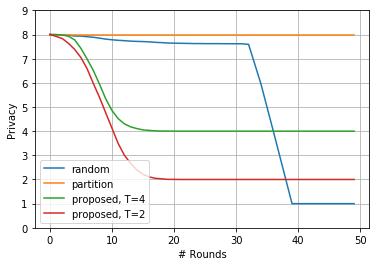

(4, 50)


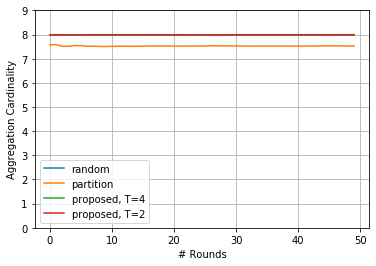

In [134]:
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt

mean_priavcy_p01 = np.sum(Privacy, axis=1)/N_trial
print(np.shape(mean_priavcy_p01))

plt.plot(mean_priavcy_p01[0,:], label='random')
plt.plot(mean_priavcy_p01[1,:], label='partition')
plt.plot(mean_priavcy_p01[2,:], label='proposed, T=4')
plt.plot(mean_priavcy_p01[3,:], label='proposed, T=2')
plt.ylabel('Privacy')
plt.xlabel('# Rounds')
plt.ylim([0,9])
plt.grid()
plt.legend()
plt.show()

mean_Agg_Card_p01 = np.sum(Agg_Card, axis=1)/N_trial
print(np.shape(mean_Agg_Card_p01))

plt.plot(mean_Agg_Card_p01[0,:], label='random')
plt.plot(mean_Agg_Card_p01[1,:], label='partition')
plt.plot(mean_Agg_Card_p01[2,:], label='proposed, T=4')
plt.plot(mean_Agg_Card_p01[3,:], label='proposed, T=2')
plt.ylabel('Aggregation Cardinality')
plt.xlabel('# Rounds')
plt.ylim([0,9])
plt.grid()
plt.legend()
plt.show()




In [135]:
J = 50  # Total iterations
p = 0.4 # dropout rate



is_print = False
# is_print = False

is_print_tmp = True

N_schemes = 4

N_trial = 1000

Agg_Card = np.zeros((N_schemes, N_trial, J))
Privacy  = np.zeros((N_schemes, N_trial, J))


for trial_idx in range(N_trial):
    
    print('trial_idx=',trial_idx)
#     print()
    
    P_random    = []
    P_partition = []
    P_proposed  = []
    P_proposed_T2 = []
    
    for j in range(J):
        u = np.random.binomial(1, 1-p, size=(N))
        if is_print:
            print('[iter=',j,'] Surviving vector u=',u)

        if np.sum(u) < K:
            p_tmp = np.zero(N)

            P_random.append(p_tmp)
            P_partition.append(p_tmp)
            P_proposed.append(p_tmp)
            P_proposed_T2.append(p_tmp)
        else:
            result = np.where(u == 1)

            ###############################
            # 1. Random Selection
            ###############################
            select = np.random.choice(result[0], K, replace=False)

            p_tmp = np.zeros(N)
            p_tmp[select] = 1

            P_random.append(p_tmp)

            # 1.1 Calculate Privacy
            P = np.array(P_random)
            P_rref = rref(P)

            P_num = np.count_nonzero(np.array(P_rref),axis = 1)
            zero_index = np.where(P_num == 0)
            P_num[zero_index] = N+1

            partial_sum = np.min(P_num)

            if j == 0:
                Privacy[0,trial_idx,j] = partial_sum
            else:
                Privacy[0,trial_idx,j] = np.min([partial_sum, Privacy[0,trial_idx,j-1]])

            # 1.2. Calculate Aggregation Cardinality
            acc_card = np.sum(np.array(P_random),axis=0)
            acc_card = np.sum(acc_card)

            Agg_Card[0,trial_idx,j] = acc_card/(j+1)


            if is_print:
                print('[iter=',j,'] @Random Method, Codebook selection')

            ###############################
            # 2. Partition
            ###############################

            tmp = Codebook_Partition * u
            codebook_en = 1*(np.sum(tmp,axis=1) == K)
    #         print(np.sum(tmp,axis=1))
    #         print(codebook_en)

            if np.sum(codebook_en) == 0:
                if is_print:
                    print('[iter=',j,'] @Partition Method, there is no available codebook')
                p_tmp = np.zeros(N)
            else:
                if is_print:
                    print('[iter=',j,'] @Partition Method, Codebook selection')
                idx_en = np.where(codebook_en == 1)
                idx_sel = np.random.choice(idx_en[0], 1, replace=False)

                p_tmp = Codebook_Partition[idx_sel[0],:]

            P_partition.append(p_tmp)

            # 2.1 Calculate Privacy
            P = np.array(P_partition)
            P_rref = rref(P)

            P_num = np.count_nonzero(np.array(P_rref),axis = 1)
            zero_index = np.where(P_num == 0)
            P_num[zero_index] = N+1

            partial_sum = np.min(P_num)
            if partial_sum == N+1:
                partial_sum = K

            if j == 0:
                Privacy[1,trial_idx,j] = partial_sum
            else:
                Privacy[1,trial_idx,j] = np.min([partial_sum, Privacy[1,trial_idx,j-1]])

            # 2.2. Calculate Aggregation Cardinality
            acc_card = np.sum(np.array(P_partition),axis=0)
            acc_card = np.sum(acc_card)

            Agg_Card[1,trial_idx,j] = acc_card/(j+1)

            ###############################
            # 3. Proposed, T_0 = 4
            ###############################

            tmp = Codebook_Proposed * u
            codebook_en = 1*(np.sum(tmp,axis=1) == K)
    #         print(np.sum(tmp,axis=1))
    #         print(codebook_en)

            if np.sum(codebook_en) == 0:
                if is_print:
                    print('[iter=',j,'] @Proposed Method, there is no available codebook')
                p_tmp = np.zeros(N)
            else:
                if is_print:
                    print('[iter=',j,'] @Proposed Method, Codebook selection')
                idx_en = np.where(codebook_en == 1)
                idx_sel = np.random.choice(idx_en[0], 1, replace=False)

    #             print('idx_sel=',idx_sel)

                p_tmp = Codebook_Proposed[idx_sel[0],:]



            P_proposed.append(p_tmp)

            # 3.1 Calculate Privacy
            P = np.array(P_proposed)

            P_rref = rref(P)

            P_num = np.count_nonzero(np.array(P_rref),axis = 1)
            zero_index = np.where(P_num == 0)
            P_num[zero_index] = N+1

            partial_sum = np.min(P_num)
            if partial_sum == N+1:
                partial_sum = K

            if j == 0:
                Privacy[2,trial_idx,j] = partial_sum
            else:
                Privacy[2,trial_idx,j] = np.min([partial_sum, Privacy[2,trial_idx,j-1]])

            # 3.2. Calculate Aggregation Cardinality
            acc_card = np.sum(np.array(P_proposed),axis=0)
            acc_card = np.sum(acc_card)

            Agg_Card[2,trial_idx,j] = acc_card/(j+1)
            
            
            
            ###############################
            # 4. Proposed, T_0 = 2
            ###############################

            tmp = Codebook_Proposed_T2 * u
            codebook_en = 1*(np.sum(tmp,axis=1) == K)
    #         print(np.sum(tmp,axis=1))
    #         print(codebook_en)

            if np.sum(codebook_en) == 0:
                if is_print:
                    print('[iter=',j,'] @Proposed Method 2, there is no available codebook')
                p_tmp = np.zeros(N)
            else:
                if is_print:
                    print('[iter=',j,'] @Proposed Method 2, Codebook selection')
                idx_en = np.where(codebook_en == 1)
                idx_sel = np.random.choice(idx_en[0], 1, replace=False)

    #             print('idx_sel=',idx_sel)

                p_tmp = Codebook_Proposed_T2[idx_sel[0],:]



            P_proposed_T2.append(p_tmp)

            # 3.1 Calculate Privacy
            P = np.array(P_proposed_T2)

            P_rref = rref(P)

            P_num = np.count_nonzero(np.array(P_rref),axis = 1)
            zero_index = np.where(P_num == 0)
            P_num[zero_index] = N+1

            partial_sum = np.min(P_num)
            if partial_sum == N+1:
                partial_sum = K

            if j == 0:
                Privacy[3,trial_idx,j] = partial_sum
            else:
                Privacy[3,trial_idx,j] = np.min([partial_sum, Privacy[3,trial_idx,j-1]])

            # 3.2. Calculate Aggregation Cardinality
            acc_card = np.sum(np.array(P_proposed_T2),axis=0)
            acc_card = np.sum(acc_card)

            Agg_Card[3,trial_idx,j] = acc_card/(j+1)


            if is_print:
                print()


        # random selection

#     print(Privacy)
#     print()
#     print(Agg_Card)

trial_idx= 0
trial_idx= 1
trial_idx= 2
trial_idx= 3
trial_idx= 4
trial_idx= 5
trial_idx= 6
trial_idx= 7
trial_idx= 8
trial_idx= 9
trial_idx= 10
trial_idx= 11
trial_idx= 12
trial_idx= 13
trial_idx= 14
trial_idx= 15
trial_idx= 16
trial_idx= 17
trial_idx= 18
trial_idx= 19
trial_idx= 20
trial_idx= 21
trial_idx= 22
trial_idx= 23
trial_idx= 24
trial_idx= 25
trial_idx= 26
trial_idx= 27
trial_idx= 28
trial_idx= 29
trial_idx= 30
trial_idx= 31
trial_idx= 32
trial_idx= 33
trial_idx= 34
trial_idx= 35
trial_idx= 36
trial_idx= 37
trial_idx= 38
trial_idx= 39
trial_idx= 40
trial_idx= 41
trial_idx= 42
trial_idx= 43
trial_idx= 44
trial_idx= 45
trial_idx= 46
trial_idx= 47
trial_idx= 48
trial_idx= 49
trial_idx= 50
trial_idx= 51
trial_idx= 52
trial_idx= 53
trial_idx= 54
trial_idx= 55
trial_idx= 56
trial_idx= 57
trial_idx= 58
trial_idx= 59
trial_idx= 60
trial_idx= 61
trial_idx= 62
trial_idx= 63
trial_idx= 64
trial_idx= 65
trial_idx= 66
trial_idx= 67
trial_idx= 68
trial_idx= 69
trial_idx= 70
trial_idx= 71
tr

trial_idx= 554
trial_idx= 555
trial_idx= 556
trial_idx= 557
trial_idx= 558
trial_idx= 559
trial_idx= 560
trial_idx= 561
trial_idx= 562
trial_idx= 563
trial_idx= 564
trial_idx= 565
trial_idx= 566
trial_idx= 567
trial_idx= 568
trial_idx= 569
trial_idx= 570
trial_idx= 571
trial_idx= 572
trial_idx= 573
trial_idx= 574
trial_idx= 575
trial_idx= 576
trial_idx= 577
trial_idx= 578
trial_idx= 579
trial_idx= 580
trial_idx= 581
trial_idx= 582
trial_idx= 583
trial_idx= 584
trial_idx= 585
trial_idx= 586
trial_idx= 587
trial_idx= 588
trial_idx= 589
trial_idx= 590
trial_idx= 591
trial_idx= 592
trial_idx= 593
trial_idx= 594
trial_idx= 595
trial_idx= 596
trial_idx= 597
trial_idx= 598
trial_idx= 599
trial_idx= 600
trial_idx= 601
trial_idx= 602
trial_idx= 603
trial_idx= 604
trial_idx= 605
trial_idx= 606
trial_idx= 607
trial_idx= 608
trial_idx= 609
trial_idx= 610
trial_idx= 611
trial_idx= 612
trial_idx= 613
trial_idx= 614
trial_idx= 615
trial_idx= 616
trial_idx= 617
trial_idx= 618
trial_idx= 619
trial_idx=

(4, 50)


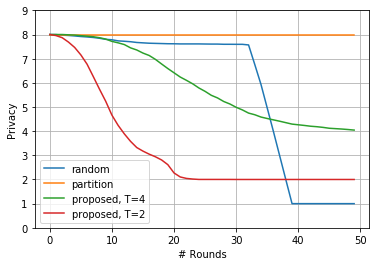

(4, 50)


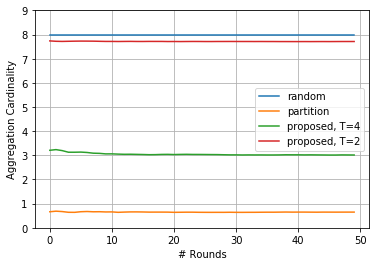

In [136]:
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt

mean_priavcy_p04 = np.sum(Privacy, axis=1)/N_trial
print(np.shape(mean_priavcy_p04))

plt.plot(mean_priavcy_p04[0,:], label='random')
plt.plot(mean_priavcy_p04[1,:], label='partition')
plt.plot(mean_priavcy_p04[2,:], label='proposed, T=4')
plt.plot(mean_priavcy_p04[3,:], label='proposed, T=2')
plt.ylabel('Privacy')
plt.xlabel('# Rounds')
plt.ylim([0,9])
plt.grid()
plt.legend()
plt.show()

mean_Agg_Card_p04 = np.sum(Agg_Card, axis=1)/N_trial
print(np.shape(mean_Agg_Card_p04))

plt.plot(mean_Agg_Card_p04[0,:], label='random')
plt.plot(mean_Agg_Card_p04[1,:], label='partition')
plt.plot(mean_Agg_Card_p04[2,:], label='proposed, T=4')
plt.plot(mean_Agg_Card_p04[3,:], label='proposed, T=2')
plt.ylabel('Aggregation Cardinality')
plt.xlabel('# Rounds')
plt.ylim([0,9])
plt.grid()
plt.legend()
plt.show()




In [141]:
p = 0.3
K = 8
pr_b_i_unavail = 1- (1-p) ** 8

all_unavail = pr_b_i_unavail ** 45
print(pr_b_i_unavail)

print((1 - all_unavail)*8)

0.94235199
7.447055137407359


In [13]:
from utils.functions import *

N = 120
T = 6
K = 12

p =0.3

R_max = int(nCr(N, K-np.floor(T/2)))
print(R_max)

# q_i = proabaility that i-th codeword is available
q_i = (1-p) ** 8
    
print(q_i)

# ((1-q_i)**200) = Pr{ all codeword is unavailable }
print(1-((1-q_i)**200))

10456592670160
0.05764800999999997
0.9999930396608473


In [2]:
from utils.functions import *
import numpy as np

N=120
K=12

R_max = int(nCr(N, K)) / int(nCr(N-K+3-1, 2))

print(R_max)
print(10456592670160/R_max)

1758608767254.1814
5.945945945945947


In [11]:
N = 120
T = 6
K = 12

p = 0.3
prob_a_bin_is_not_available = 1 - ((1-p) ** T)
print(prob_a_bin_is_not_available)

sum = 0

prob_array = np.zeros((int(N/T)+1))

# L = int(N/T)
# print(L)
for j in range(int(N/T)+1):
#     print(j)
    prob_array[j] = nCr(L, j)* (prob_a_bin_is_not_available ** j) * (1-prob_a_bin_is_not_available)**(L-j)

# print(prob_array)
# print(np.sum(prob_array))
for j in range(int(N/T- K/T +1),int(N/T)+1):
    print(j)
    
#     sum = sum + (prob_a_bin_is_not_available ** j)
    sum = sum + nCr(L, j)* (prob_a_bin_is_not_available ** j) * (1-prob_a_bin_is_not_available)**(L-j)

print(sum)

print((1-sum)*K)


0.882351
19
20
0.2999887589901408
8.40013489211831
